In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the data from the parquet file
df = pd.read_parquet('gtech_2023_phase.parquet')
df.columns

Index(['subject', 'task', 'task_info', 'activity_number', 'time_r',
       'hip_angle_s_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_s_r',
       'ankle_angle_s_r',
       ...
       'toes_l_X', 'toes_l_X_velocity', 'LForceX', 'grf_y_l', 'LForceZ',
       'cop_x_l', 'LCOPY_Vertical', 'cop_z_l', 'phase_l', 'phase'],
      dtype='object', length=117)

In [7]:
print(df.task.unique())
# num_subjects = len(df.subject.unique())
# num_stairs_steps = 0
# subject_idx = 0
# while num_stairs_steps == 0:
#     df_stair = df[(df.task == 'stairs') & (df.subject == df.subject.unique()[subject_idx])]
#     num_stairs_steps = len(df_stair)
#     subject_idx += 1

df_stair = df[df.task == 'stairs']
print(df_stair.columns)

['ball_toss' 'curb_down' 'curb_up' 'cutting' 'dynamic_walk' 'incline_walk'
 'jump' 'lift_weight' 'lunges' 'normal_walk' 'side_shuffle' 'sit_to_stand'
 'squats' 'stairs' 'step_ups' 'tire_run' 'turn_and_step' 'walk_backward'
 'weighted_walk']
Index(['subject', 'task', 'task_info', 'activity_number', 'time_r',
       'hip_angle_s_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_s_r',
       'ankle_angle_s_r',
       ...
       'toes_l_X', 'toes_l_X_velocity', 'LForceX', 'grf_y_l', 'LForceZ',
       'cop_x_l', 'LCOPY_Vertical', 'cop_z_l', 'phase_l', 'phase'],
      dtype='object', length=117)


Hip angles array shape: (169, 150) (number of steps x samples per step)


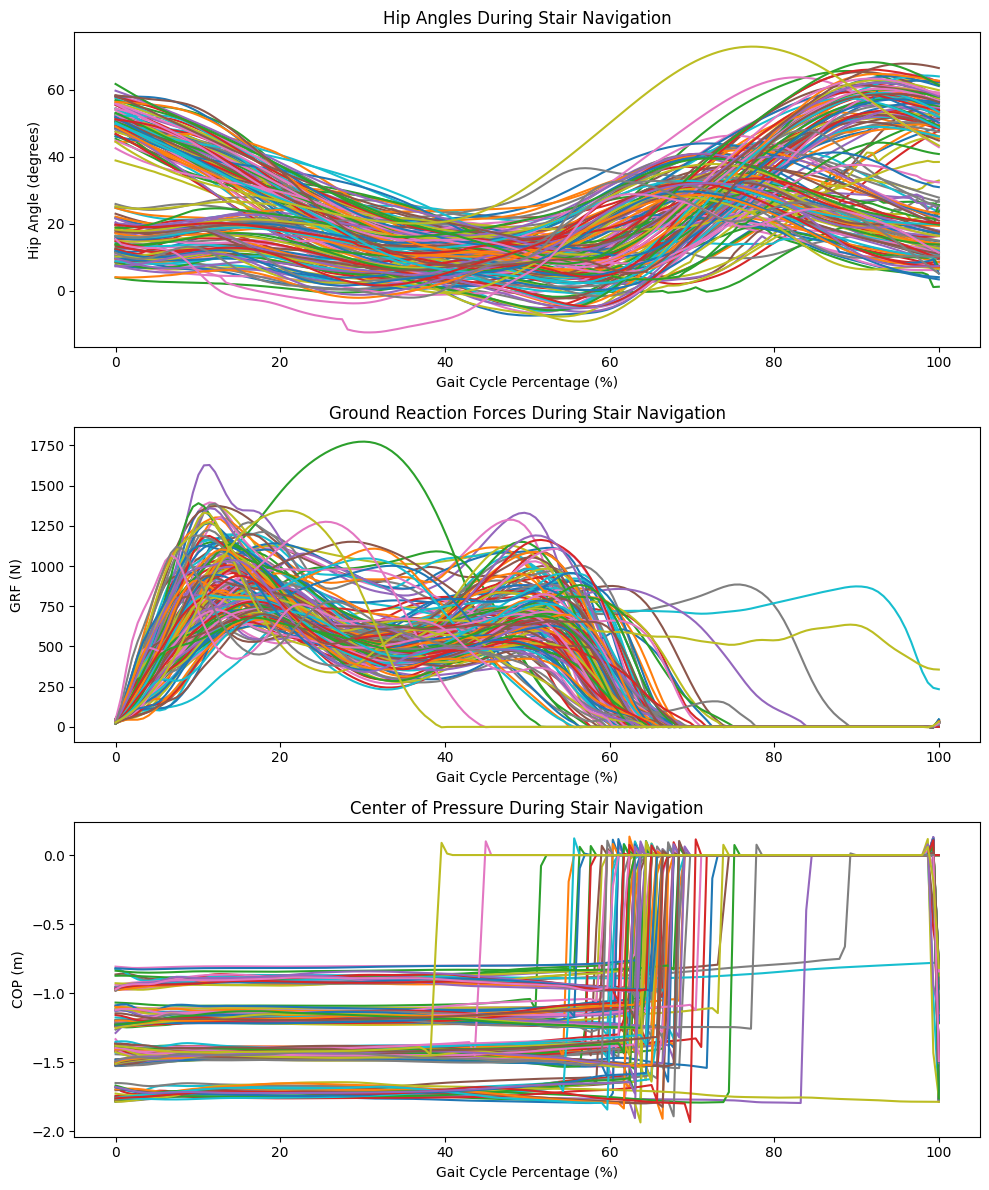

In [20]:
# Add this at the top of your notebook cell
%matplotlib inline

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Create normalized x-axis (0 to 100%)
x_normalized = np.linspace(0, 100, 150)

# Plot the hip angles
hip_angles = df_stair['hip_angle_s_r'].values.reshape(-1,150)
# Print shape of hip angles array to see number of steps and samples per step
print(f"Hip angles array shape: {hip_angles.shape} (number of steps x samples per step)")

for step_idx in range(hip_angles.shape[0]):
    ax1.plot(x_normalized, hip_angles[step_idx])

# Add plot labels for hip angles
ax1.set_title('Hip Angles During Stair Navigation')
ax1.set_xlabel('Gait Cycle Percentage (%)')
ax1.set_ylabel('Hip Angle (degrees)')

# Plot the GRF
grf_y = df_stair['grf_y_r'].values.reshape(-1,150)
for step_idx in range(grf_y.shape[0]):
    ax2.plot(x_normalized, grf_y[step_idx])

# Add plot labels for GRF
ax2.set_title('Ground Reaction Forces During Stair Navigation')
ax2.set_xlabel('Gait Cycle Percentage (%)')
ax2.set_ylabel('GRF (N)')

# Plot the COP
cop_z = df_stair['cop_z_r'].values.reshape(-1,150)
for step_idx in range(cop_z.shape[0]):
    ax3.plot(x_normalized, cop_z[step_idx])

# Add plot labels for COP
ax3.set_title('Center of Pressure During Stair Navigation')
ax3.set_xlabel('Gait Cycle Percentage (%)')
ax3.set_ylabel('COP (m)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Explicitly show the plot
plt.show()


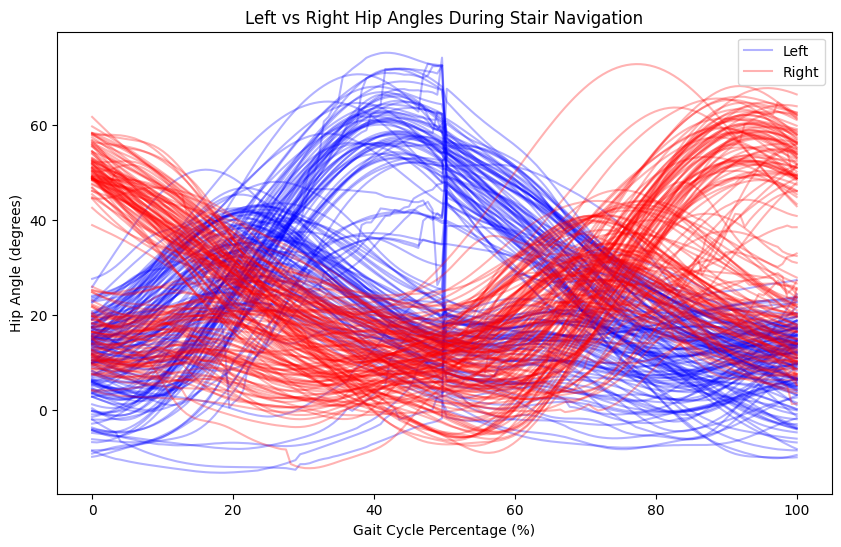

In [21]:
# Create figure for comparing left and right hip angles
plt.figure(figsize=(10, 6))

# Get hip angles for both sides and reshape
hip_angles_left = df_stair['hip_angle_s_l'].values.reshape(-1,150)
hip_angles_right = df_stair['hip_angle_s_r'].values.reshape(-1,150)

# Create normalized x-axis (0 to 100%)
x_normalized = np.linspace(0, 100, 150)

# Plot each step for left hip
for step_idx in range(hip_angles_left.shape[0]):
    plt.plot(x_normalized, hip_angles_left[step_idx], 'b', alpha=0.3, label='Left' if step_idx==0 else "")
    
# Plot each step for right hip    
for step_idx in range(hip_angles_right.shape[0]):
    plt.plot(x_normalized, hip_angles_right[step_idx], 'r', alpha=0.3, label='Right' if step_idx==0 else "")

plt.title('Left vs Right Hip Angles During Stair Navigation')
plt.xlabel('Gait Cycle Percentage (%)')
plt.ylabel('Hip Angle (degrees)')
plt.legend()

plt.show()


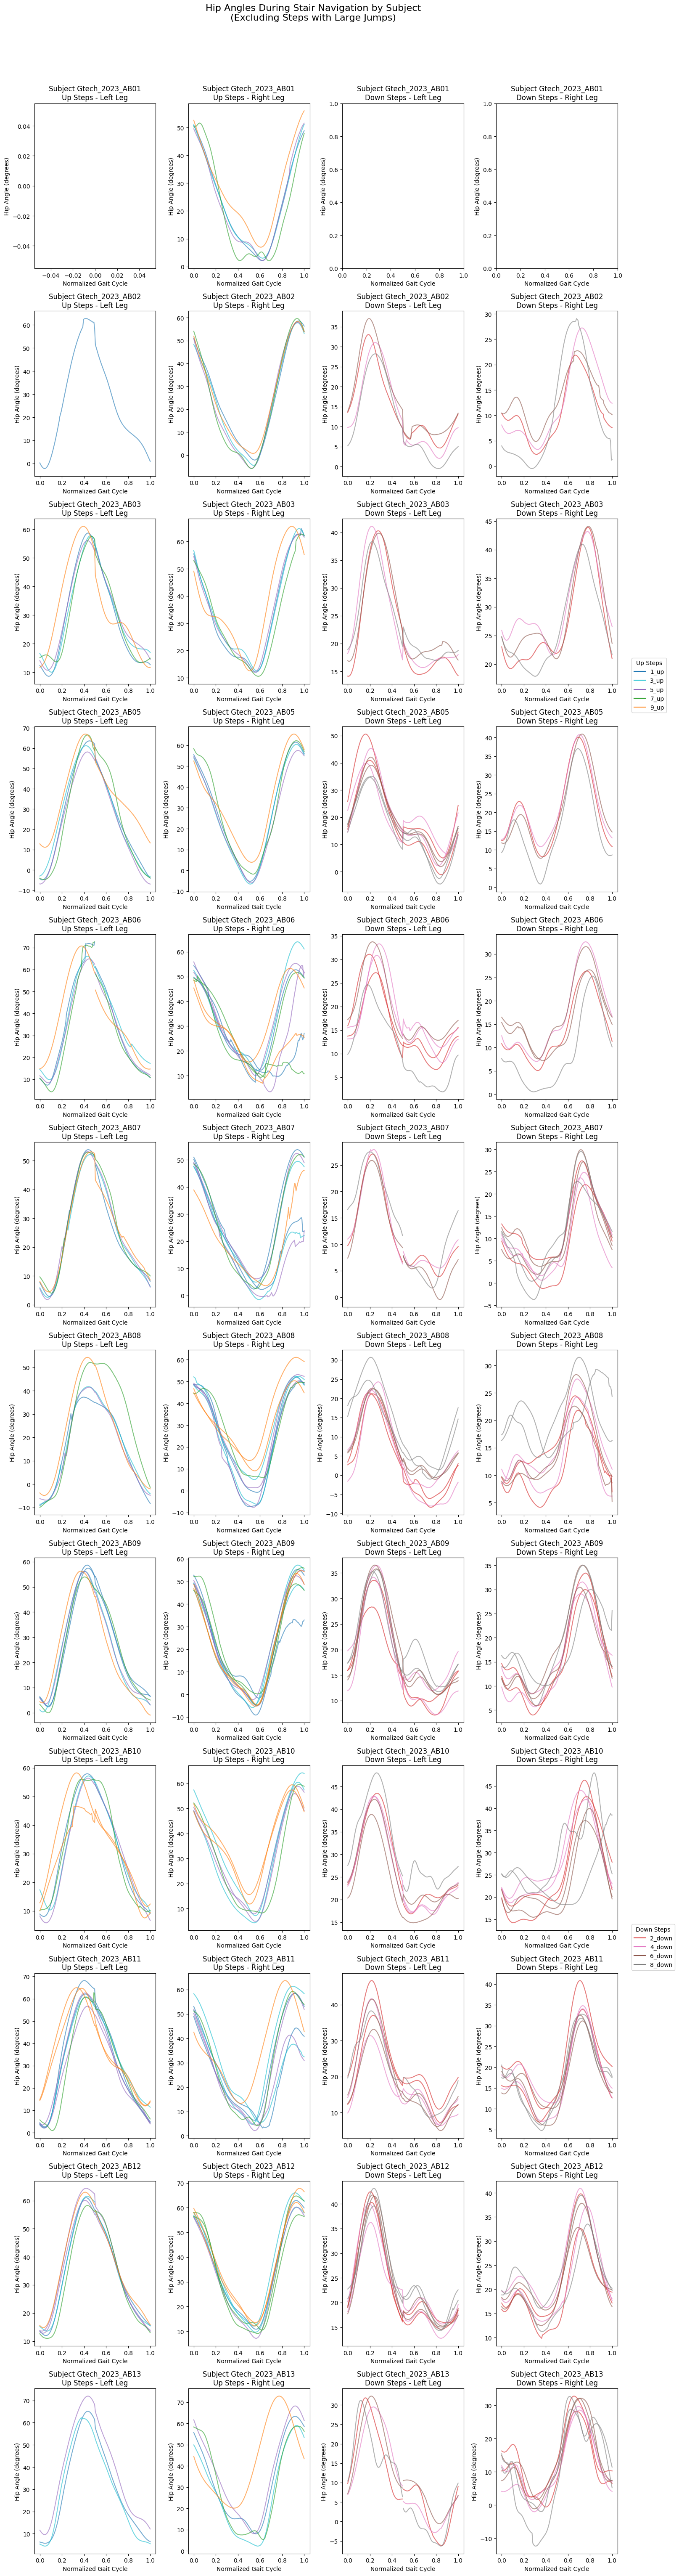

In [ ]:
# Get unique subjects
subjects = df_stair['subject'].unique()
n_subjects = len(subjects)

# Create figure with subplots - one row per subject, four columns (left/right up/down)
fig, axes = plt.subplots(n_subjects, 4, figsize=(15, 5*n_subjects))

# Create color maps for up and down tasks
up_colors = {
    '1_up_segmented': '#1f77b4',  # Bright blue
    '3_up_segmented': '#17becf',  # Light blue 
    '5_up_segmented': '#9467bd',  # Purple
    '7_up_segmented': '#2ca02c',  # Green
    '9_up_segmented': '#ff7f0e'   # Orange
}

down_colors = {
    '2_down_segmented': '#d62728',  # Red
    '4_down_segmented': '#e377c2',  # Pink
    '6_down_segmented': '#8c564b',  # Brown
    '8_down_segmented': '#7f7f7f'   # Gray
}

plotting_var = 'ankle_angle_s_'

# Keep track of which tasks are plotted
plotted_up_tasks = set()
plotted_down_tasks = set()

# Create normalized x-axis (0 to 1)
x_normalized = np.linspace(0, 1, 150)

# For each subject
for idx, subject in enumerate(subjects):
    # Get data for this subject
    subject_data = df_stair[df_stair['subject'] == subject]
    
    # Get unique task_info for this subject
    subject_tasks = subject_data['task_info'].unique()
    
    # Plot up tasks in first two columns (left and right)
    ax_up_left = axes[idx, 0]
    ax_up_right = axes[idx, 1]
    for task in subject_tasks:
        if 'up' in task:
            # Filter data for this task
            task_data = subject_data[subject_data['task_info'] == task]
            
            # Get hip angles and reshape
            hip_angles_left = task_data[plotting_var + 'l'].values.reshape(-1,150)
            hip_angles_right = task_data[plotting_var + 'r'].values.reshape(-1,150)
            
            # Calculate differences between consecutive points
            left_diffs = np.abs(np.diff(hip_angles_left, axis=1))
            right_diffs = np.abs(np.diff(hip_angles_right, axis=1))
            
            # Find steps without large jumps
            jump_threshold = 10
            left_valid_steps = ~np.any(left_diffs > jump_threshold, axis=1)
            right_valid_steps = ~np.any(right_diffs > jump_threshold, axis=1)
            
            # Plot valid steps - left leg in first column
            for step_idx in range(hip_angles_left.shape[0]):
                if left_valid_steps[step_idx]:
                    plotted_up_tasks.add(task)
                    ax_up_left.plot(x_normalized, hip_angles_left[step_idx],
                                  color=up_colors[task],
                                  alpha=0.6)
                    
            # Plot valid steps - right leg in second column
            for step_idx in range(hip_angles_right.shape[0]):
                if right_valid_steps[step_idx]:
                    plotted_up_tasks.add(task)
                    ax_up_right.plot(x_normalized, hip_angles_right[step_idx],
                                   color=up_colors[task],
                                   alpha=0.6)
    
    # Plot down tasks in third and fourth columns (left and right)            
    ax_down_left = axes[idx, 2]
    ax_down_right = axes[idx, 3]
    for task in subject_tasks:
        if 'down' in task:
            # Filter data for this task
            task_data = subject_data[subject_data['task_info'] == task]
            
            # Get hip angles and reshape
            hip_angles_left = task_data[plotting_var + 'l'].values.reshape(-1,150)
            hip_angles_right = task_data[plotting_var + 'r'].values.reshape(-1,150)
            
            # Calculate differences between consecutive points
            left_diffs = np.abs(np.diff(hip_angles_left, axis=1))
            right_diffs = np.abs(np.diff(hip_angles_right, axis=1))
            
            # Find steps without large jumps
            jump_threshold = 10
            left_valid_steps = ~np.any(left_diffs > jump_threshold, axis=1)
            right_valid_steps = ~np.any(right_diffs > jump_threshold, axis=1)
            
            # Plot valid steps - left leg in third column
            for step_idx in range(hip_angles_left.shape[0]):
                if left_valid_steps[step_idx]:
                    plotted_down_tasks.add(task)
                    ax_down_left.plot(x_normalized, hip_angles_left[step_idx],
                                    color=down_colors[task],
                                    alpha=0.6)
                    
            # Plot valid steps - right leg in fourth column
            for step_idx in range(hip_angles_right.shape[0]):
                if right_valid_steps[step_idx]:
                    plotted_down_tasks.add(task)
                    ax_down_right.plot(x_normalized, hip_angles_right[step_idx],
                                     color=down_colors[task],
                                     alpha=0.6)
    
    # Add labels and titles
    ax_up_left.set_title(f'Subject {subject}\nUp Steps - Left Leg')
    ax_up_left.set_xlabel('Normalized Gait Cycle')
    ax_up_left.set_ylabel(plotting_var.replace('_', ' ').capitalize())
    
    ax_up_right.set_title(f'Subject {subject}\nUp Steps - Right Leg')
    ax_up_right.set_xlabel('Normalized Gait Cycle')
    ax_up_right.set_ylabel(plotting_var.replace('_', ' ').capitalize())
    
    ax_down_left.set_title(f'Subject {subject}\nDown Steps - Left Leg')
    ax_down_left.set_xlabel('Normalized Gait Cycle')
    ax_down_left.set_ylabel(plotting_var.replace('_', ' ').capitalize())
    
    ax_down_right.set_title(f'Subject {subject}\nDown Steps - Right Leg')
    ax_down_right.set_xlabel('Normalized Gait Cycle')
    ax_down_right.set_ylabel(plotting_var.replace('_', ' ').capitalize())

# Add legends for task colors
legend_up = [plt.Line2D([0], [0], color=up_colors[task], label=task.replace('_segmented',''))
            for task in sorted(plotted_up_tasks)]
legend_down = [plt.Line2D([0], [0], color=down_colors[task], label=task.replace('_segmented',''))
              for task in sorted(plotted_down_tasks)]

fig.legend(handles=legend_up,
          loc='center left',
          bbox_to_anchor=(1.0, 0.75),
          title='Up Steps')

fig.legend(handles=legend_down,
          loc='center left',
          bbox_to_anchor=(1.0, 0.25),
          title='Down Steps')

plt.suptitle('Hip Angles During Stair Navigation by Subject\n(Excluding Steps with Large Jumps)',
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [12]:
df_stair.task_info.unique()

array(['1_up_segmented', '3_up_segmented', '5_up_segmented',
       '7_up_segmented', '9_up_segmented', '2_down_segmented',
       '4_down_segmented', '6_down_segmented', '8_down_segmented'],
      dtype=object)